In [1]:
import numpy as np
from manim import *
from yty_manim.disposition.fonts_and_colors import *
from yty_manim.basic_unit.squ_tex import *
from yty_manim.basic_unit.screen_cycle import *
from yty_manim.application.page_replacement import *
from yty_manim.basic_unit.code_step import *

Manim Community v0.19.0

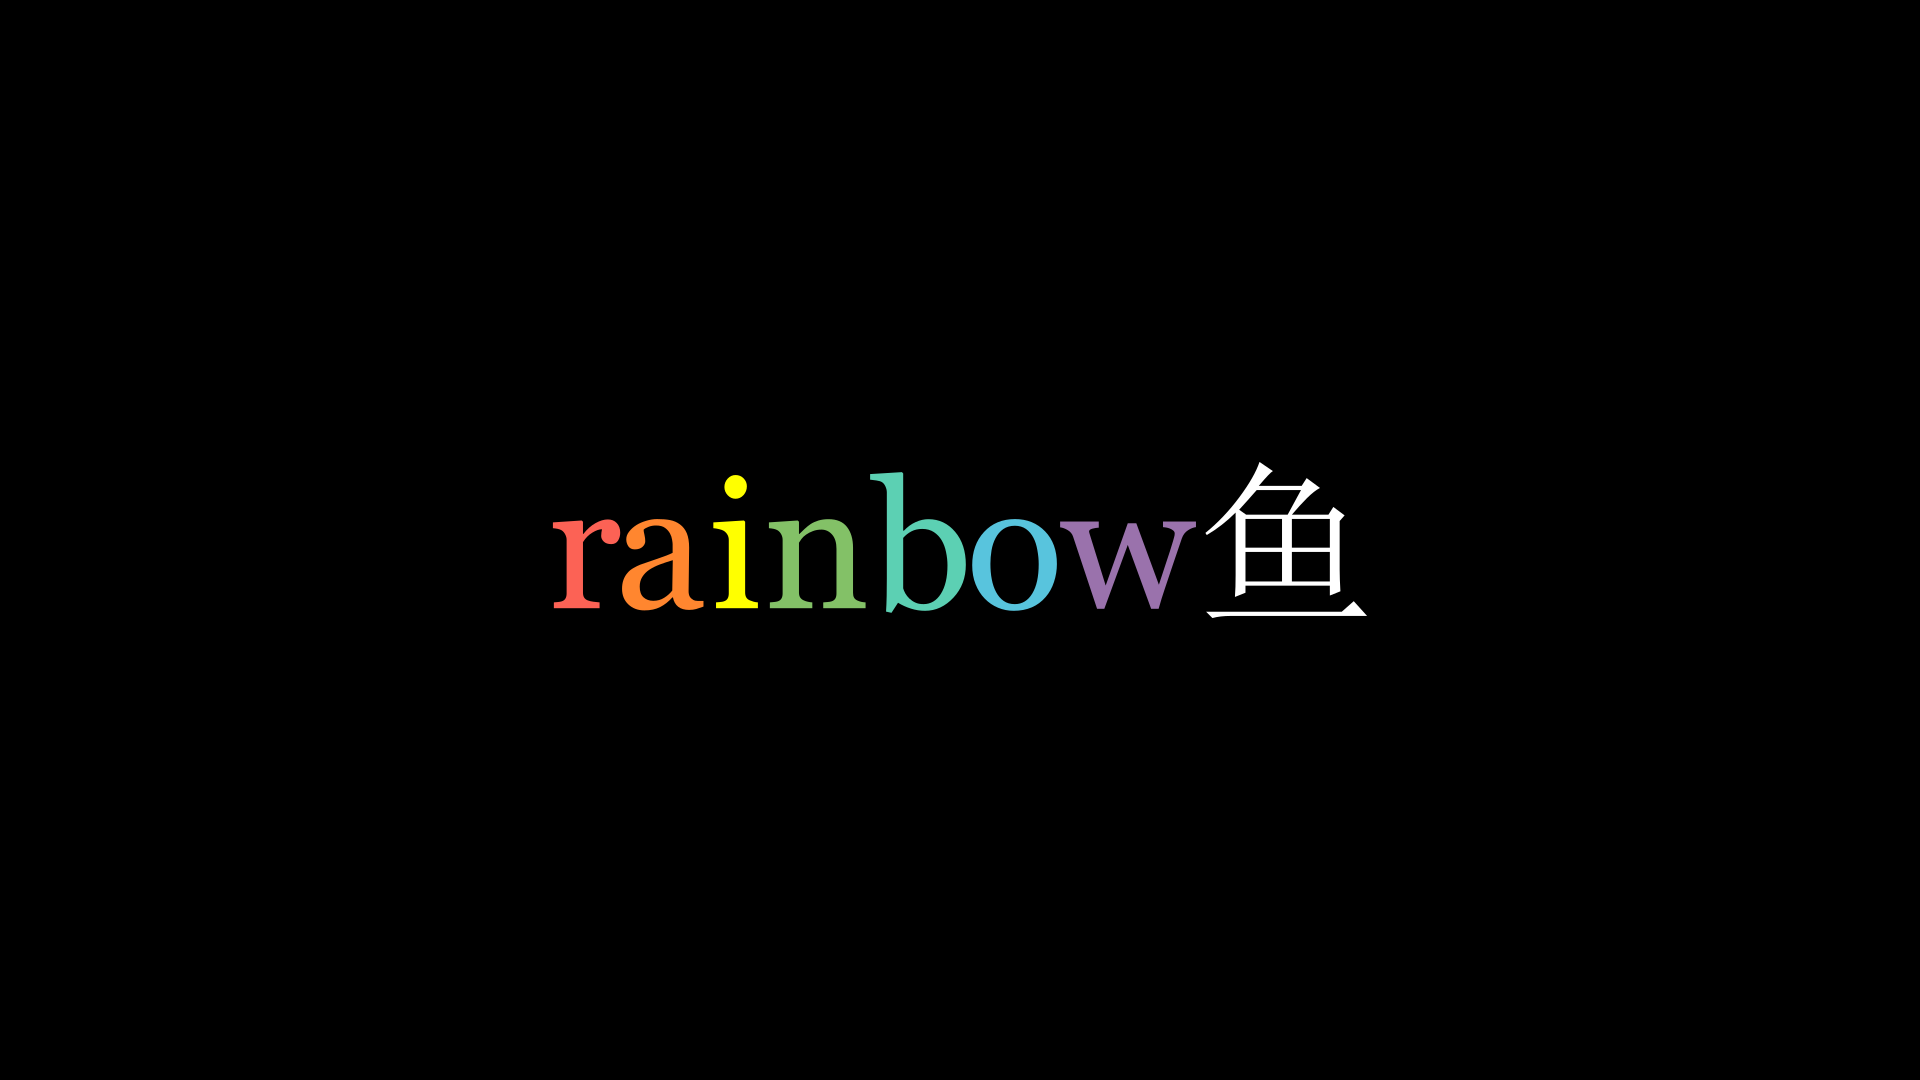

In [22]:
%%manim -qh -v WARNING RainbowYu
class RainbowYu(Scene):
    def construct(self):
        logo = Text("rainbow鱼")
        for i in range(len(logo)):
            logo[i].set_color(gradient_dict['rainbow_color'][i] if i < 7 else WHITE)
        self.add(logo.scale(2))

Manim Community v0.19.0

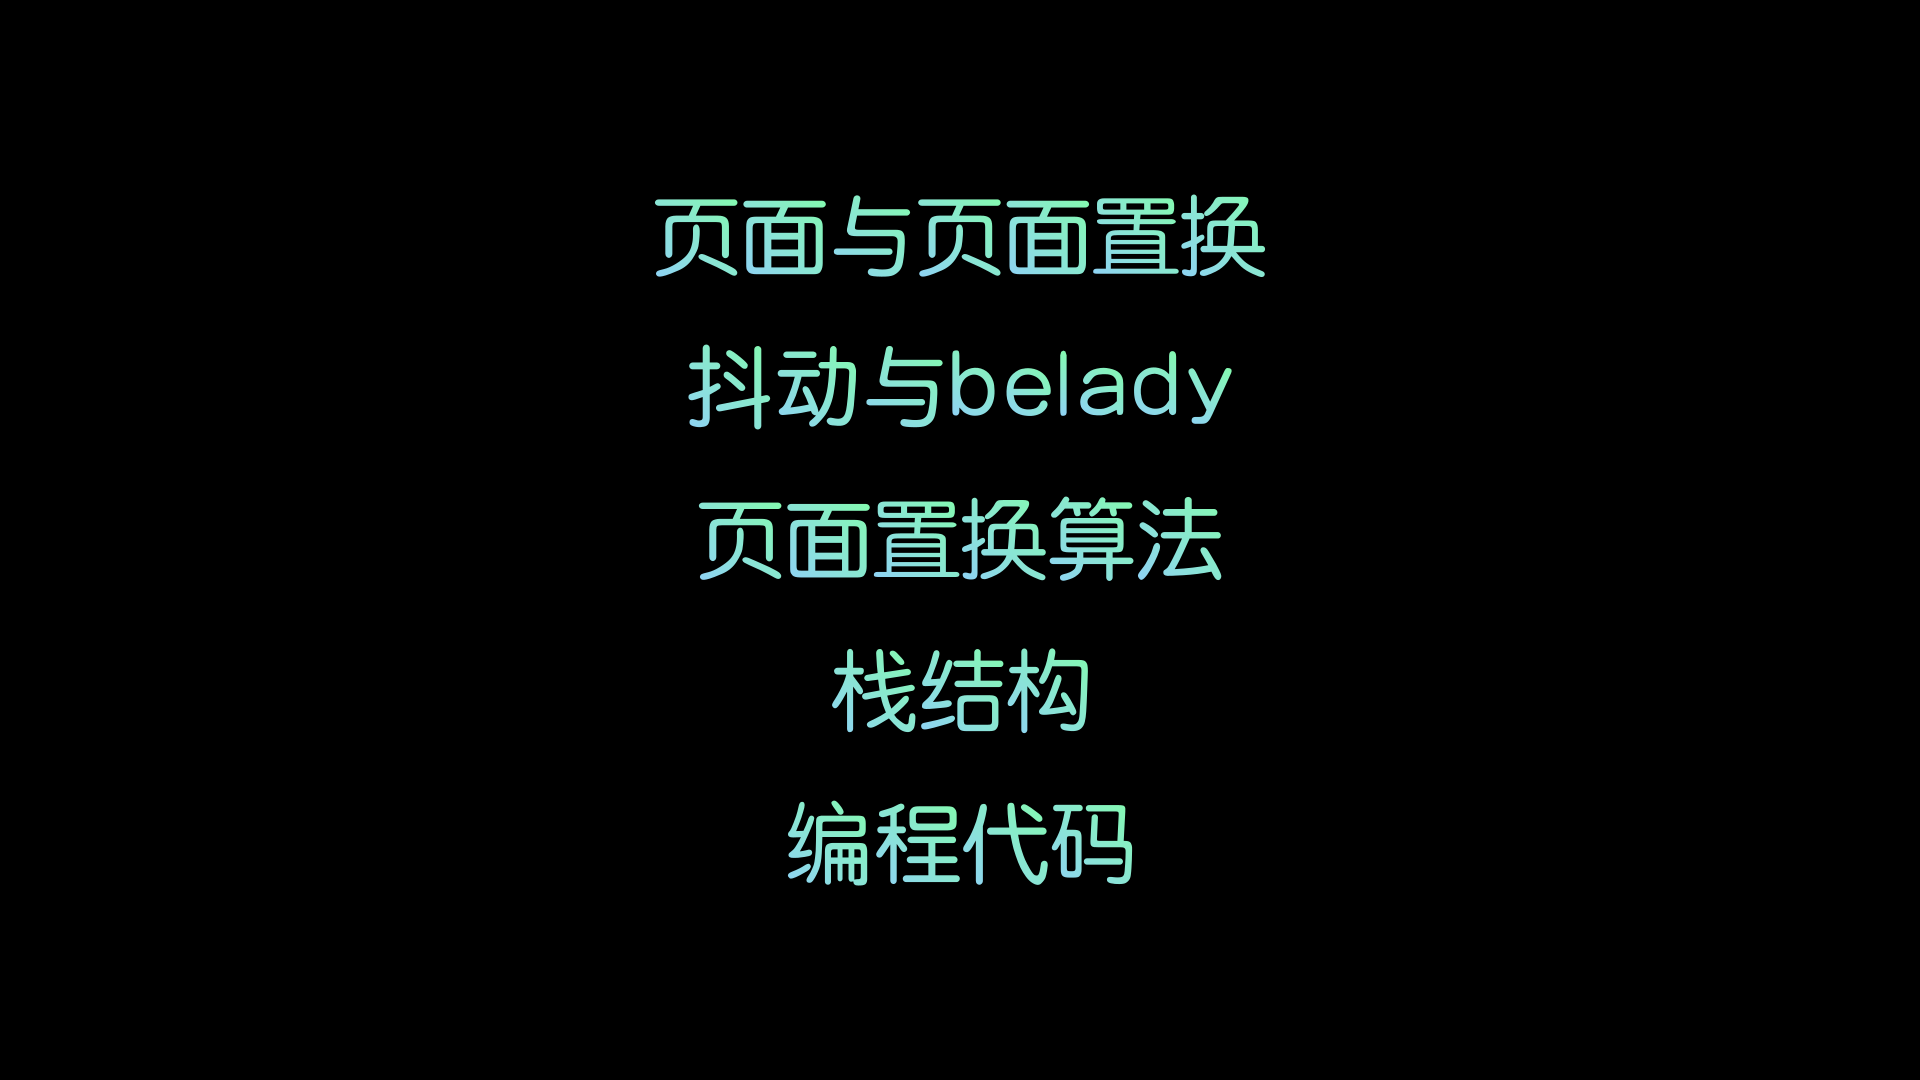

In [7]:
%%manim -qh -v WARNING TitleIntroduction

class TitleIntroduction(Scene):
    def construct(self):
        title = ScreenCycle(
            [
                "页面与页面置换",
                "抖动与belady",
                "页面置换算法",
                "栈结构",
                "编程代码"
            ],
            buff_distance=0.5
        )

        self.add(title)

In [26]:
%%manim -qh -v WARNING IntroductionPage
class IntroductionPage(Scene):
    def construct(self):
        storage = Rectangle(
            width=10,
            height=1,
            color=BLUE,
            fill_opacity=0.5,
            stroke_opacity=0.8
        ).shift(UP)

        virtual = SquTexSlide(
            [i for i in range(10)],
            side_length=1,
            color=BLUE,
            fill_opacity=0.5,
            stroke_opacity=0.8
        ).shift(UP)
        for i in range(10):
            virtual[i].set_color(gradient_dict['rainbow_color_plus'][i % 7])

        page_frame = Rectangle(
            width=4,
            height=1,
            color=GRAY,
            fill_opacity=0.5,
            stroke_opacity=0.8
        ).shift(DOWN * 2)

        page_frame_inv = SquTexSlide(
            [i for i in range(4)],
            side_length=1,
        ).shift(DOWN * 2)

        introduction_text = VGroup(
            Text("物理地址",font=text_font[0]).set_color(gradient_dict['favourite']).shift(UP*2),
            Text("虚拟地址",font=text_font[0]).set_color(gradient_dict['favourite']).shift(UP*2),
            Text("页框",font=text_font[0]).set_color(gradient_dict['favourite']).shift(DOWN),
        )

        self.wait()
        self.play(Create(storage))
        self.wait(3)
        self.play(Write(introduction_text[0]))
        self.wait(3)
        self.play(
            Transform(storage, virtual),
            Transform(introduction_text[0],introduction_text[1])
        )
        self.wait(3)
        self.play(
            Create(page_frame),
            Write(introduction_text[2])
        )
        self.wait(4)

        new_squ = storage[0].copy()

        self.add(new_squ)
        self.play(new_squ.animate.move_to(page_frame_inv[0]))
        self.wait(3)

        new_st_slide = SquTexSlide(
            '0',
            side_length=1,
            fill_opacity=0.5,
            stroke_opacity=0.8
        ).move_to(new_squ).set_color(RED)

        def move_and_add(num,towards,ori:SquTexSlide):
            new_squ = storage[num].copy()
            self.play(new_squ.animate.move_to(page_frame_inv[towards]))
            ori.add(new_squ)

        move_and_add(6,1,new_st_slide)
        self.wait()
        move_and_add(2,2,new_st_slide)
        move_and_add(3,3,new_st_slide)
        self.wait(4)
        self.remove(new_squ)
        self.play(
            *new_st_slide.pop(-2),
        )
        self.wait(3)
        move_and_add(1,3,new_st_slide)
        self.wait(3)

        self.play(
            *new_st_slide.pop(-2),
        )
        self.wait(3)
        move_and_add(9,3,new_st_slide)
        self.wait(10)
        self.play(
            Uncreate(new_st_slide),
            Uncreate(introduction_text[2]),
            Uncreate(introduction_text[0]),
            Uncreate(page_frame),
            Uncreate(storage),
            run_time=0.5,
        )
        self.wait()


Manim Community v0.19.0

In [6]:
%%manim -qh -v WARNING LossRatingPage
class LossRatingPage(Scene):
    def construct(self):
        number_st_slide = VGroup()
        for i in range(10):
            st_slide = SquTexSlide(
                f"{i}",
                side_length=1,
                fill_opacity=0.5,
                stroke_opacity=0.8
            ).set_color(gradient_dict['rainbow_color'][i % 7])
            number_st_slide.add(st_slide)

        sc_0 = number_st_slide[0] # shallow copies
        self.wait()
        self.play(Create(sc_0))
        self.play(*sc_0.push(number_st_slide[6], force_center = True, force_color = True))
        self.play(*sc_0.push(number_st_slide[2], force_center = True, force_color = True))
        self.play(*sc_0.push(number_st_slide[3], force_center = True, force_color = True))
        self.play(*sc_0.pop(-2))
        self.play(*sc_0.push(number_st_slide[1]))
        self.play(*sc_0.pop(-2))
        self.play(*sc_0.push(number_st_slide[9]))
        for _ in range(4):
            self.play(*sc_0.slide_fade(1))
        self.wait(2)

        l = [1,2,3,4,5,1,2,3,4]
        p = FifoPageReplacement(l,4,need_miss_rate=False,need_stack=False)
        p.shift(UP)
        pc = p.page_frame.copy()
        self.play(
            Create(p.pages),
            Transform(sc_0,pc),
            run_time=2,
        )
        self.remove(sc_0)
        self.add(p.page_frame)
        self.wait(2)
        self.play(Create(p.page_highlight))
        for i in range(len(l)):
            p.step_on(self,i,0.5)
        self.wait(2)
        self.play(
            Uncreate(p),
        )
        self.wait(2)
        jitter = Text("抖 动",font=text_font[0]).set_color(gradient_dict['favourite']).scale(1.5)
        self.play(Write(jitter))
        self.wait(3)
        self.play(Unwrite(jitter))
        self.wait(2)


Manim Community v0.19.0

In [16]:
%%manim -qh -v WARNING BeladyPage
class BeladyPage(Scene):
    def construct(self):
        loss_text = Text("缺页率",font=text_font[0]).set_color(gradient_dict['favourite']).scale(1.5)
        rate_tex = VGroup(
            Text("=",font=text_font[0]).shift(LEFT*2),
            Text("缺页次数",font=text_font[0]).shift(UP*0.5),
            Line(np.array([-1,0,0]),np.array([1,0,0])).scale(1.5),
            Text("总访问数",font=text_font[0]).shift(DOWN*0.5)
        ).set_color(gradient_dict['Sunny_Morning']).shift(DOWN)
        self.wait()
        self.play(Write(loss_text))
        self.wait()
        self.play(
            loss_text.animate.shift(UP),
            Write(rate_tex),
        )
        self.wait(5)
        self.play(
            Unwrite(loss_text),
            Unwrite(rate_tex),
        )
        self.wait(2)

        lst = [1,2,3,4,1,2,5,1,2,3,4,5]
        p_1 = FifoPageReplacement(lst,4,need_stack=False)
        p_1.shift(DOWN)
        p_2 = FifoPageReplacement(lst,3,need_stack=False)
        p_2.shift(UP*3)
        t_1 = Text("页框数3:",font=text_font[0]).shift(LEFT*5.5).scale(0.7).shift(UP*2).set_color_by_gradient(gradient_dict['favourite'])
        t_2 = Text("页框数4:",font=text_font[0]).shift(LEFT*5.5).scale(0.7).shift(DOWN*2).set_color_by_gradient(gradient_dict['favourite'])
        self.play(
            Create(p_1.basic_unit),
            Create(p_2.basic_unit),
            Create(t_1),
            Create(t_2),
        )
        self.wait()

        for i in range(len(lst)):
            p_2.step_on(self,i,0.3)
            p_1.step_on(self,i,0.3)
        self.wait(5)
        self.play(
            Uncreate(p_1),
            Uncreate(p_2),
            Uncreate(t_1),
            Uncreate(t_2),
        )
        self.wait()

        belady = Text("belady",font=text_font[0]).set_color(gradient_dict['favourite']).scale(1.5)
        self.play(Write(belady))
        self.wait(3)
        self.play(Unwrite(belady))
        self.wait(2)

Manim Community v0.19.0

In [21]:
%%manim -qh -v WARNING PageReplacement
class PageReplacement(Scene):
    def construct(self):
        page_list = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]

        s_t = ScreenCycle([
            "OPT",
            "FIFO",
            "LRU"
        ])
        self.wait()
        self.play(Write(s_t))
        self.wait()
        self.play(s_t.animate.step_forward())
        self.wait()
        self.play(s_t.animate.set_to_edge(UL))
        self.wait()

        # --- opt

        p_opt = OptPageReplacement(page_list,4)
        self.play(Create(p_opt.basic_unit))
        for i in range(len(page_list) - 1):
            p_opt.step_on(self,i,0.5)
        self.wait(2)
        self.play(Uncreate(p_opt))

        # ---

        self.wait()
        self.play(s_t.animate.set_back())
        self.play(s_t.animate.step_forward())
        self.wait()
        self.play(s_t.animate.set_to_edge(UL))
        self.wait()

        # ---  fifo

        p_fifo = FifoPageReplacement(page_list,4,need_stack=False)
        self.play(Create(p_fifo .basic_unit))
        for i in range(len(page_list) - 1):
            p_fifo .step_on(self,i,0.3)
        self.wait(2)
        self.play(Uncreate(p_fifo))

        # ---

        self.wait()
        self.play(s_t.animate.set_back())
        self.play(s_t.animate.step_forward())
        self.wait()
        self.play(s_t.animate.set_to_edge(UL))
        self.wait()

        # ---  lru

        p_lru = LruPageReplacement(page_list,4,need_stack=False)
        self.play(Create(p_lru .basic_unit))
        for i in range(len(page_list) - 1):
            p_lru .step_on(self,i,0.5)
        self.wait(2)
        self.play(Uncreate(p_lru))

        # ---

        self.play(s_t.animate.set_back())
        self.play(s_t.animate.step_forward())
        self.wait(2)
        self.play(Unwrite(s_t))
        self.wait(2)

Manim Community v0.19.0

In [2]:
%%manim -qh -v WARNING StackPageReplacement
class StackPageReplacement(Scene):
    def construct(self):
        page_list = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]

        s_t = ScreenCycle([
            "FIFO",
            "LRU"
        ])
        self.wait()
        self.play(Write(s_t))
        self.wait()
        self.play(s_t.animate.step_forward())
        self.wait()
        self.play(s_t.animate.set_to_edge(UL))
        self.wait()

        # ---  fifo

        p_fifo = FifoPageReplacement(page_list,4)
        self.play(Create(p_fifo .basic_unit))
        for i in range(len(page_list) - 1):
            p_fifo .step_on(self,i,0.3)
        self.wait(2)
        self.play(Uncreate(p_fifo))

        # ---

        self.wait()
        self.play(s_t.animate.set_back())
        self.play(s_t.animate.step_forward())
        self.wait()
        self.play(s_t.animate.set_to_edge(UL))
        self.wait()

        # ---  lru

        p_lru = LruPageReplacement(page_list,4)
        self.play(Create(p_lru .basic_unit))
        for i in range(len(page_list) - 1):
            p_lru .step_on(self,i,0.3)
        self.wait(2)
        self.play(Uncreate(p_lru))

        # ---

        self.play(s_t.animate.set_back())
        self.play(s_t.animate.step_forward())
        self.wait(2)
        self.play(Unwrite(s_t))
        self.wait(2)

Manim Community v0.19.0

In [5]:
code_string = [
    """
    def get_opt(step):
        for i in range(step + 1, len(self.page_lst)):
            if self.page_lst[step] == self.page_lst[i]:
                return i
        return len(self.page_lst) - 1

    # 已有页面
    if len(self.page_frame_lst) != 0:
        for j in range(len(self.page_frame_lst)):
            if self.page_lst[step] == self.page_lst[self.page_frame_lst[j]]:
                self.page_frame_lst[j] = get_opt(step)
                return j, get_opt(step)

    # 页面未填满
    if len(self.page_frame_lst) < self.page_frame_num:
        self.page_frame_lst.append(get_opt(step))
        self.loss_page += 1
        return self.loss_page - 1, get_opt(step)

    # 缺页中断
    else:
        max_opt_id = self.page_frame_lst.index(max(self.page_frame_lst))
        new_exp = get_opt(step)
        self.page_frame_lst[max_opt_id] = new_exp
        self.loss_page += 1
        return max_opt_id, new_exp
    """,

    """
    # 不缺页
    for j in range(len(self.stack_lst)):
        self.stack_step_check()
        if self.stack_lst[j] == self.page_lst[step]:
            popped = self.stack_lst.pop(j)
            self.stack_lst.append(popped)
            return j, self.stack_lst[-1]

    # 新增页面
    if len(self.stack_lst) < self.page_frame_num:
        self.stack_lst.append(self.page_lst[step])
        return "pass", self.page_lst[step]

    # 缺页
    else:
        self.stack_lst.pop(0)
        self.stack_lst.append(self.page_lst[step])
        return 0, self.page_lst[step]
    """
]

In [6]:
%%manim -qh -v WARNING CodeShow
class CodeShow(Scene):
    def construct(self):
        c1 = CodeStep(
            code_string=code_string[1],
            language="python",
            background="rectangle",
            formatter_style = Code.get_styles_list()[10],
        ).scale(0.5)
        self.wait()
        for i in range(17):
            c1.write_code(self,1)
            self.wait(10)

Manim Community v0.19.0